In [3]:
import oxemu.src.cosmology as sc
import matplotlib.pylab as plt 

In [4]:
module = sc.PowerSpectrum(0.0, 5.0, 5E-4, 1.0)

In [5]:
parameter = {'Omega_b': 0.022, 'Omega_cdm': 0.12,'n_s': 1.0, 'h':0.75, 'ln10^{10}A_s': 3.0}

In [6]:
plin = module.pk_linear(cosmology=parameter)

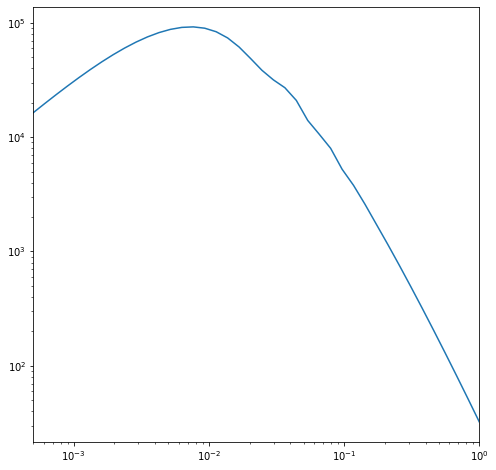

In [9]:
plt.figure(figsize = (8,8))
plt.loglog(module.wavenumber, plin)
plt.xlim(module.k_min, module.k_max)
plt.show()

# Generate the Training Points

In [1]:
from trainingpoints import pk_linear

In [3]:
cosmos, pkl = pk_linear('lhs_500', redshift=0.0)